In [257]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
df = pd.read_csv('cars.csv')
df

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [259]:
cars_df = df.drop(columns=['Unnamed: 0'])
cars_df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [260]:
cars_df.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

### Normalize the data

In [261]:
features = ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[features])

#### Determine the number of clusters using the Elbow Method

In [262]:
inertia = []
range_clusters = range(1, 10)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

#### Plotting the elbow method

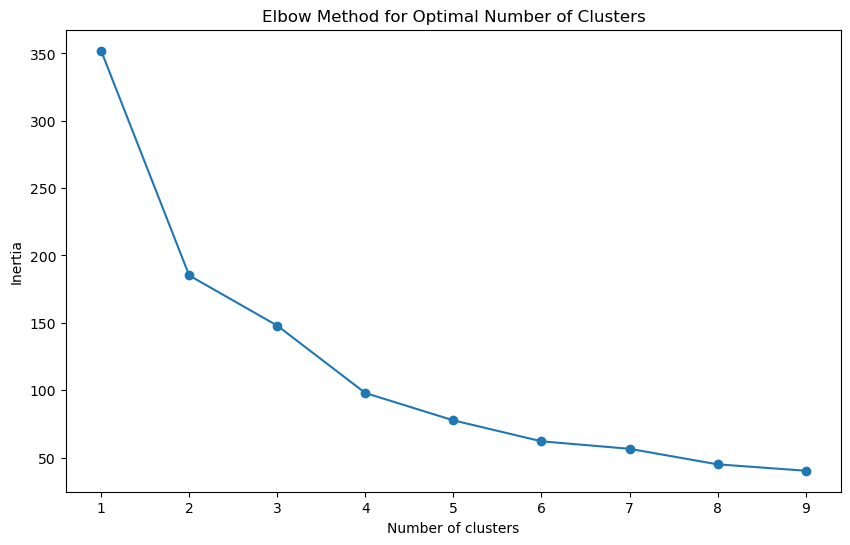

In [263]:
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

#### Perform KMeans clustering with 4 clusters

In [264]:

# Looking at the plot graph, we can see that at 4 is the optimal point
# where the within-cluster sum of squares (WCSS) starts to decrease at 
# slower rate so going with 4 clusters

kmeans = KMeans(n_clusters=4, random_state=42)
cars_df['cluster'] = kmeans.fit_predict(normalized_data)

# Describe the clusters in terms of all variables used in clustering
cluster_descriptions_4 = cars_df.groupby('cluster').mean()

cars_df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,2
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,2
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,3
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0


In [265]:
# Calculate summary statistics
summary_stats = cars_df.groupby('cluster').agg({
    'mpg': ['mean', 'median', 'std'],
}).reset_index()

print(summary_stats)

  cluster        mpg                 
                mean median       std
0       0  15.050000  15.20  2.774396
1       1  20.742857  21.40  2.471071
2       2  18.500000  19.70  2.893095
3       3  28.075000  28.85  4.483860


#### Visualize the clusters

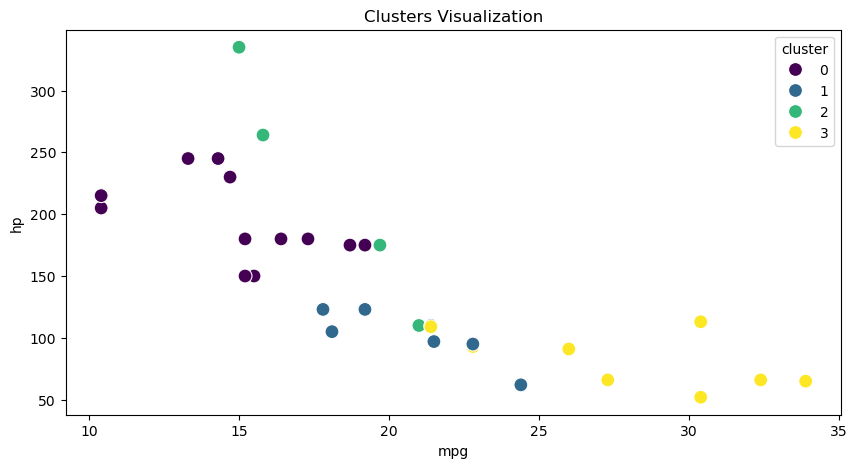

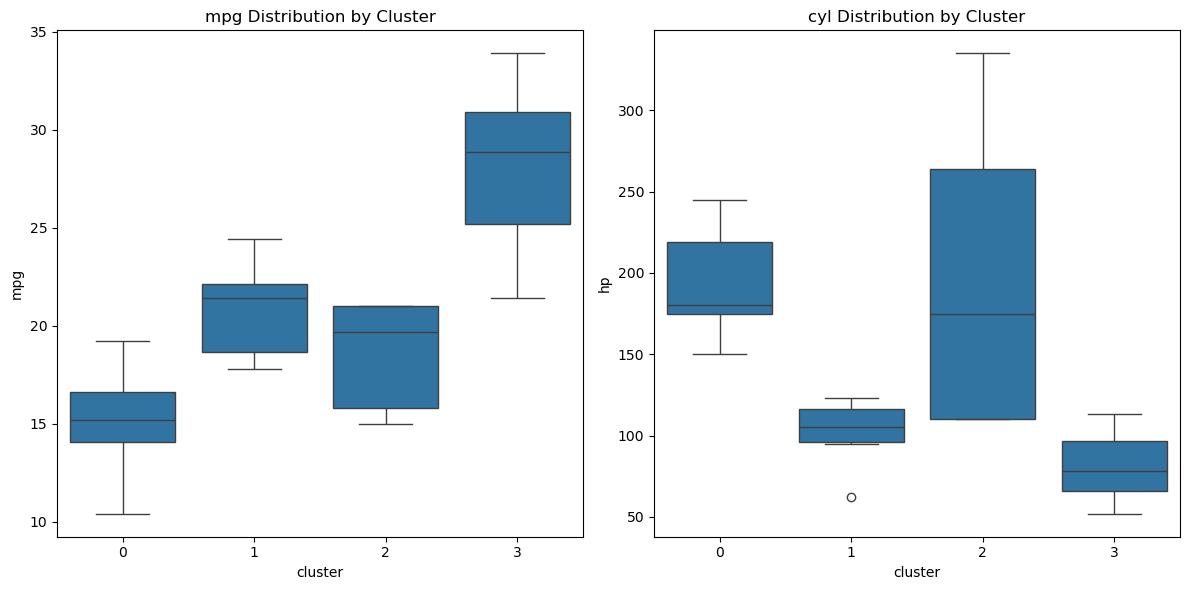

In [274]:

plt.figure(figsize=(10, 5))
sns.scatterplot(x='mpg', y='hp', hue='cluster', data=cars_df, palette='viridis', s=100)
plt.title('Clusters Visualization')
plt.show()

# Box plots for each feature by cluster
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='cluster', y='mpg', data=cars_df)
plt.title('mpg Distribution by Cluster')

plt.subplot(1, 2, 2)
sns.boxplot(x='cluster', y='hp', data=cars_df)
plt.title('cyl Distribution by Cluster')

plt.tight_layout()
plt.show()